## Linear Regressions on the Snow-Off ASO vs ICE-SAT2

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import rasterio as rio
import matplotlib.dates as mdates
import geopandas as gpd
import scipy.stats as stats

In [2]:
# Import data files from excel
summer_2020_fp = 'data/summer_2020_difference_betterslope.csv'
summer_2020 = pd.read_csv(summer_2020_fp)
summer_2020.head()

,Unnamed: 0,geometry,Track,Unnamed: 0.1,Unnamed: 0.1.1,date,dem_h,h_te_max,h_te_mean,h_te_median,...,latitude,longitude,n_te_photons,segment_snowcover,terrain_slope,x,y,h_aso,slope_aso,difference
0,0,POINT (296110.0791624115 4200924.17812425),gt3l,174,174.0,10/06/2020,3190.208252,3152.922852,3123.977783,3124.115479,...,37.933041,-119.320015,211.0,1.0,-0.467523,296110.079162,4.200924e+06,3124.627441,NaN,-0.511963
1,1,POINT (296096.2014315608 4200824.979677469),gt3l,175,175.0,10/06/2020,3133.827393,3103.147217,3087.289062,3087.147461,...,37.932144,-119.320145,417.0,1.0,-0.291937,296096.201432,4.200825e+06,3087.254883,20.547213,-0.107422
2,2,POINT (296082.983529917 4200725.341222636),gt3l,176,176.0,10/06/2020,3086.844971,3074.830078,3065.325439,3064.654053,...,37.931244,-119.320267,447.0,1.0,-0.178536,296082.983530,4.200725e+06,3064.038818,12.650502,0.615234
3,3,POINT (296069.7759606871 4200626.126119612),gt3l,177,177.0,10/06/2020,3065.124512,3057.640625,3049.267578,3048.199707,...,37.930347,-119.320389,537.0,1.0,-0.076852,296069.775961,4.200626e+06,3048.850098,7.090505,-0.650391
4,4,POINT (296057.8988700601 4200526.454301283),gt3l,178,178.0,10/06/2020,3055.509521,3047.717773,3041.521973,3040.587891,...,37.929447,-119.320496,532.0,1.0,-0.099972,296057.898870,4.200526e+06,3040.695068,7.160444,-0.107178


In [3]:
# Take Absolute Values of Slope and Elevation Difference
summer_2020['slope_aso_abs'] = abs(summer_2020['slope_aso'])
summer_2020['difference_abs'] = abs(summer_2020['difference'])
#summer_2020.head()

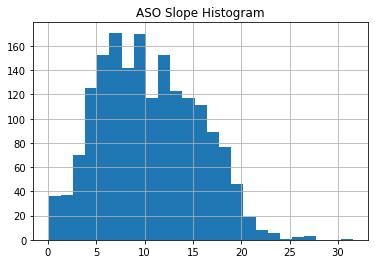

In [4]:
fig, ax = plt.subplots()
ax.hist(summer_2020['slope_aso'], bins='auto');
ax.set_title('ASO Slope Histogram');
plt.grid()

### Linear Regression - ASO and ICE-SAT Elevations

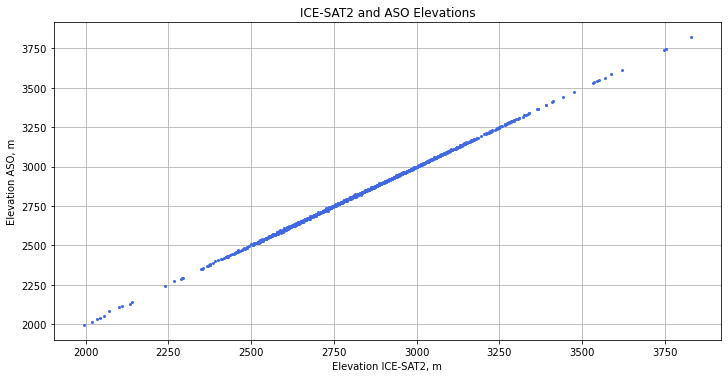

In [5]:
# A Plot Data (https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot)
fig, ax = plt.subplots(figsize=(10,5))
fig.tight_layout()

ax.plot(summer_2020['h_te_median'], summer_2020['h_aso'], 'o', markersize =2, color='royalblue', linestyle = 'none');

#plt.grid()
ax.set_ylabel('Elevation ASO, m');
ax.set_xlabel('Elevation ICE-SAT2, m');
ax.set_title('ICE-SAT2 and ASO Elevations');
plt.grid()

In [6]:
# use the linear regression function
mask = ~np.isnan(summer_2020.h_te_median) & ~np.isnan(summer_2020.h_aso)

slope, intercept, rvalue, pvalue, stderr = stats.linregress(summer_2020.h_te_median[mask], summer_2020.h_aso[mask])

print('B0 : {}'.format(np.round(intercept,4)))
print('B1 : {}'.format(np.round(slope,4)))

print('R^2 : {}'.format(np.round(rvalue**2,3)))
print('R : {}'.format(np.round(rvalue,3)))
print('stderr : {}'.format(np.round(stderr,3)))

B0 : 4.1323
B1 : 0.9985
R^2 : 1.0
R : 1.0
stderr : 0.0


In [7]:
x = summer_2020.h_te_median # using x for shorthand below
y = summer_2020.h_aso # using y for shorthand below

# Compute the SST for x
sst_x = np.sum( (x - np.mean(x))**2 )

# Compute the standard error
sigma = stderr * np.sqrt(sst_x)
print('sigma : {}'.format(np.round(sigma,3)))

sigma : 2.288


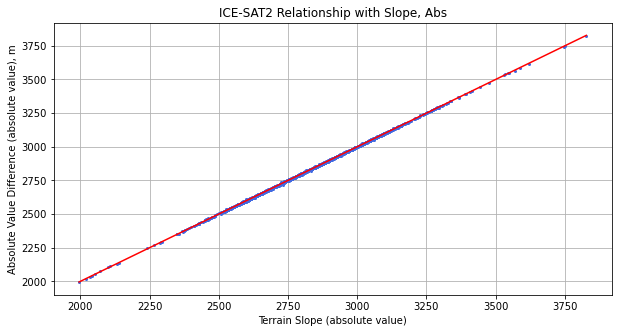

In [8]:
fig, ax = plt.subplots(figsize=(10,5))

# Scatterplot
ax.plot(summer_2020['h_te_median'], summer_2020['h_aso'], 'o', markersize =2, color='royalblue', linestyle = 'none', label='Dana Meadows');


# Create points for the regression line
x = np.linspace(summer_2020.h_te_median.min(), summer_2020.h_te_median.max(), summer_2020.h_te_median.size) # x coordinates from min and max values of SLI_max
y = slope * x + intercept # y coordinates using the slope and intercept from our linear regression

# Plot the regression line
ax.plot(x, y, '-r')

ax.set_ylabel('Absolute Value Difference (absolute value), m');
ax.set_xlabel('Terrain Slope (absolute value)');
ax.set_title('ICE-SAT2 Relationship with Slope, Abs');


plt.grid()

### Linear Regression - ASO Slope to Elevation Difference Between ICE-SAT2 and ASO

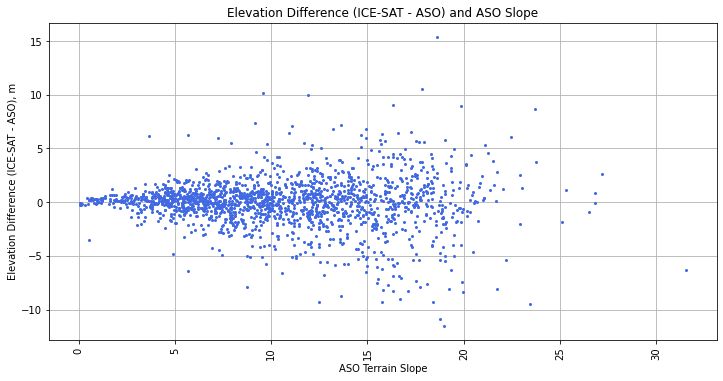

In [9]:
# A Plot Data (https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot)
fig, ax = plt.subplots(figsize=(10,5))
fig.tight_layout()

ax.plot(summer_2020['slope_aso'], summer_2020['difference'], 'o', markersize =2, color='royalblue', linestyle = 'none');

#plt.grid()
ax.set_ylabel('Elevation Difference (ICE-SAT - ASO), m');
ax.set_xlabel('ASO Terrain Slope');
ax.set_title('Elevation Difference (ICE-SAT - ASO) and ASO Slope');
plt.xticks(rotation = 'vertical');
plt.grid()

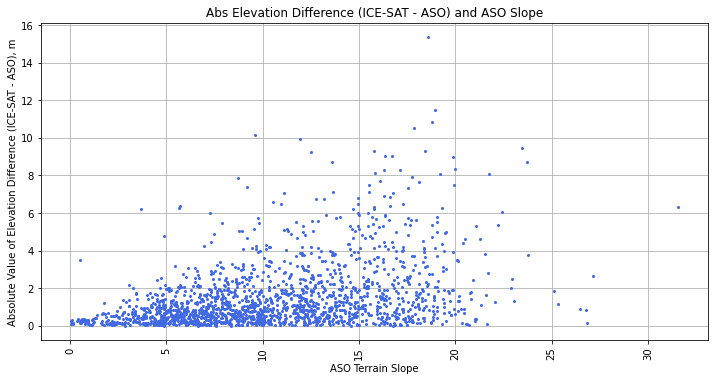

In [10]:
# A Plot Data (https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot)
fig, ax = plt.subplots(figsize=(10,5))
fig.tight_layout()

ax.plot(summer_2020['slope_aso_abs'], summer_2020['difference_abs'], 'o', markersize =2, color='royalblue', linestyle = 'none', label='Dana Meadows');

#plt.grid()
ax.set_ylabel('Absolute Value of Elevation Difference (ICE-SAT - ASO), m');
ax.set_xlabel('ASO Terrain Slope');
ax.set_title('Abs Elevation Difference (ICE-SAT - ASO) and ASO Slope');
plt.xticks(rotation = 'vertical');
plt.grid()

In [11]:
# use the linear regression function
mask = ~np.isnan(summer_2020.slope_aso_abs) & ~np.isnan(summer_2020.difference_abs)

slope, intercept, rvalue, pvalue, stderr = stats.linregress(summer_2020.slope_aso_abs[mask], summer_2020.difference_abs[mask])

print('B0 : {}'.format(np.round(intercept,4)))
print('B1 : {}'.format(np.round(slope,4)))

print('R^2 : {}'.format(np.round(rvalue**2,3)))
print('R : {}'.format(np.round(rvalue,3)))
print('stderr : {}'.format(np.round(stderr,3)))

B0 : 0.137
B1 : 0.1297
R^2 : 0.148
R : 0.385
stderr : 0.007


In [12]:
x = summer_2020.slope_aso_abs # using x for shorthand below
y = summer_2020.difference_abs # using y for shorthand below

# Compute the SST for x
sst_x = np.sum( (x - np.mean(x))**2 )

# Compute the standard error
sigma = stderr * np.sqrt(sst_x)
print('sigma : {}'.format(np.round(sigma,3)))

sigma : 1.576


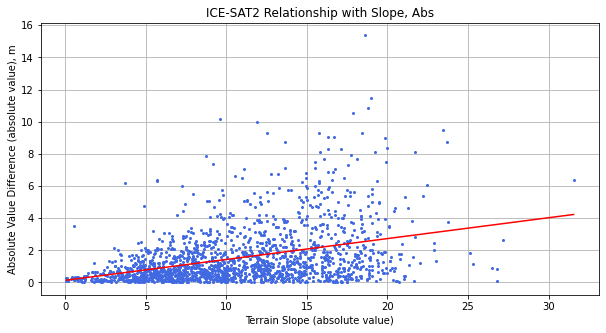

In [13]:
fig, ax = plt.subplots(figsize=(10,5))

# Scatterplot
ax.plot(summer_2020['slope_aso_abs'], summer_2020['difference_abs'], 'o', markersize =2, color='royalblue', linestyle = 'none', label='Dana Meadows');


# Create points for the regression line
x = np.linspace(summer_2020.slope_aso_abs.min(), summer_2020.slope_aso_abs.max(), summer_2020.slope_aso_abs.size) # x coordinates from min and max values of SLI_max
y = slope * x + intercept # y coordinates using the slope and intercept from our linear regression

# Plot the regression line
ax.plot(x, y, '-r')

ax.set_ylabel('Absolute Value Difference (absolute value), m');
ax.set_xlabel('Terrain Slope (absolute value)');
ax.set_title('ICE-SAT2 Relationship with Slope, Abs');


plt.grid()